In [14]:
import numpy as np
import pandas as pd
import imageio
import h5py

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
dataset_dir = Path('data')

In [3]:
csv_files = list(dataset_dir.glob('*.csv'))

In [45]:
csv = pd.read_csv(csv_files[1])

In [46]:
csv.sample(10)

,timestamp,biosignal_0,biosignal_1,biosignal_2,biosignal_3,biosignal_4,biosignal_5,biosignal_6,biosignal_7,acceleration_x,...,predicted_orientation_y,predicted_orientation_z,predicted_orientation_w,predicted_orientation_yaw,predicted_orientation_pitch,predicted_orientation_roll,predicted_projection_left,predicted_projection_top,predicted_projection_right,predicted_projection_bottom
6818,1466475264042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.299284,...,-0.070048,-0.016957,0.994225,-0.137156,0.156539,-0.044874,-1.0,1.0,1.0,-1.0
6536,1463144907625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.368718,...,-0.033922,-0.023297,0.997144,-0.064829,0.125190,-0.050779,-1.0,1.0,1.0,-1.0
15317,1566842600871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134079,...,-0.197230,0.015277,0.974601,-0.398107,0.212245,-0.011631,-1.0,1.0,1.0,-1.0
1747,1406590031302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.332804,...,0.217027,-0.016388,0.969105,0.438433,0.234201,0.018606,-1.0,1.0,1.0,-1.0
3442,1426608417643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.165205,...,-0.140573,-0.001056,0.984321,-0.280311,0.211119,-0.032039,-1.0,1.0,1.0,-1.0
9480,1497911524629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440547,...,-0.247551,-0.007935,0.965845,-0.497983,0.143878,-0.053057,-1.0,1.0,1.0,-1.0
2200,1411940587712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241822,...,0.142362,-0.012875,0.982178,0.286717,0.245876,0.009458,-1.0,1.0,1.0,-1.0
8822,1490139897325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.169994,...,0.194583,-0.028235,0.976926,0.395202,0.174886,-0.022710,-1.0,1.0,1.0,-1.0
9724,1500792944891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.234639,...,-0.175834,-0.004349,0.980641,-0.351568,0.168183,-0.038804,-1.0,1.0,1.0,-1.0
4022,1433456663380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150839,...,0.277628,-0.029082,0.955592,0.565804,0.197953,-0.003136,-1.0,1.0,1.0,-1.0


In [47]:
csv.columns

Index(['timestamp', 'biosignal_0', 'biosignal_1', 'biosignal_2', 'biosignal_3',
       'biosignal_4', 'biosignal_5', 'biosignal_6', 'biosignal_7',
       'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_vec_x',
       'angular_vec_y', 'angular_vec_z', 'magnetic_x', 'magnetic_y',
       'magnetic_z', 'input_orientation_x', 'input_orientation_y',
       'input_orientation_z', 'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll',
       'input_projection_left', 'input_projection_top',
       'input_projection_right', 'input_projection_bottom', 'prediction_time',
       'predicted_orientation_x', 'predicted_orientation_y',
       'predicted_orientation_z', 'predicted_orientation_w',
       'predicted_orientation_yaw', 'predicted_orientation_pitch',
       'predicted_orientation_roll', 'predicted_projection_left',
       'predicted_projection_top', 'predicted_projection_right',
       'predicted_projection_bottom'],
      d

In [48]:
using_columns = ['timestamp',
                 'acceleration_x', 'acceleration_y', 'acceleration_z',
                 'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
                 'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
                 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [49]:
csv[using_columns]

,timestamp,acceleration_x,acceleration_y,acceleration_z,angular_vec_x,angular_vec_y,angular_vec_z,input_orientation_x,input_orientation_y,input_orientation_z,input_orientation_w,input_orientation_yaw,input_orientation_pitch,input_orientation_roll
0,1371432477542,1.017567,9.560339,2.521171,0.412594,-0.396059,-0.178612,-0.099760,0.014192,0.030190,0.994452,0.034313,-0.200947,0.057245
1,1371436278012,1.036721,9.565128,2.454132,0.422978,-0.396059,-0.191440,-0.096169,0.010547,0.028824,0.994892,0.026574,-0.193463,0.055352
2,1371456315397,1.012778,9.428655,2.394275,0.427865,-0.403389,-0.220762,-0.092568,0.006761,0.025921,0.995346,0.018282,-0.185929,0.050370
3,1371468877546,1.007990,9.529214,2.320052,0.423589,-0.405222,-0.235423,-0.088889,0.003042,0.023969,0.995749,0.010331,-0.178309,0.047210
4,1371480335540,1.043904,9.663293,2.250618,0.444970,-0.414385,-0.240309,-0.084275,-0.000667,0.022210,0.996195,0.002418,-0.168845,0.044378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18979,1610089061270,-0.308861,9.510059,-2.214704,0.040577,0.068199,0.046797,0.116501,-0.229385,0.011884,0.966265,-0.462593,0.232799,-0.030486
18980,1610100653817,-0.249005,9.507666,-2.236253,0.039355,0.097520,0.049241,0.116695,-0.227760,0.012670,0.966616,-0.459447,0.233583,-0.028667
18981,1610113332499,-0.205908,9.433443,-2.257801,0.035690,0.124398,0.044965,0.117107,-0.226228,0.012764,0.966925,-0.456330,0.234478,-0.028307
18982,1610124380241,-0.205908,9.325701,-2.248224,0.020418,0.147000,0.041910,0.116670,-0.224261,0.013271,0.967429,-0.452445,0.233901,-0.026655


In [50]:
len(using_columns)

14

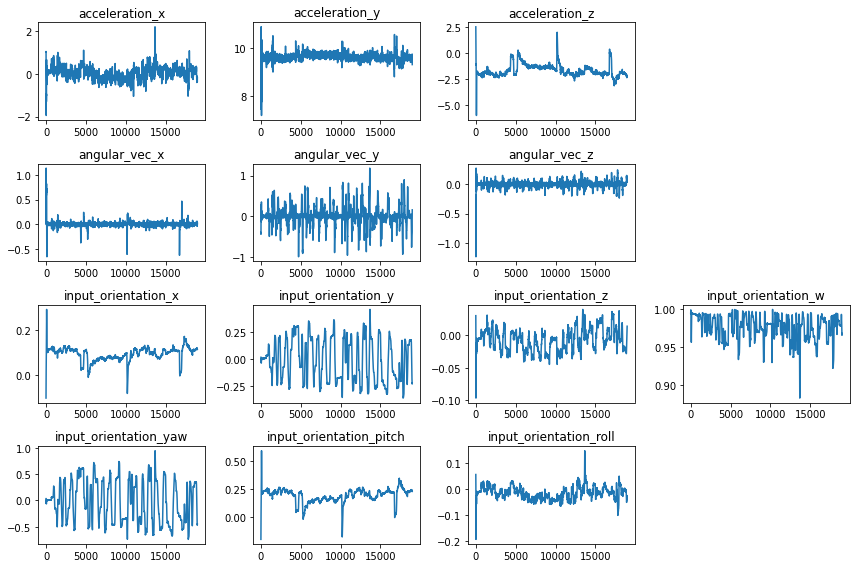

In [51]:
plt.figure(figsize=(12, 8))

for i in range(3):
    plt.subplot(4, 4, i+1)
    plt.plot(csv[using_columns[i+1]])
    plt.title(using_columns[i+1])
for i in range(3):
    plt.subplot(4, 4, i+5)
    plt.plot(csv[using_columns[i+4]])
    plt.title(using_columns[i+4])
for i in range(4):
    plt.subplot(4, 4, i+9)
    plt.plot(csv[using_columns[i+7]])
    plt.title(using_columns[i+7])
for i in range(3):
    plt.subplot(4, 4, i+13)
    plt.plot(csv[using_columns[i+11]])
    plt.title(using_columns[i+11])

plt.tight_layout()
plt.show()

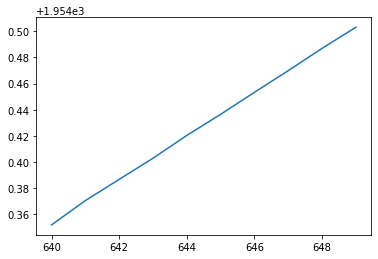

In [52]:
plt.plot(csv['timestamp'][640:650] / 705600000)

In [53]:
t_diff = [T[i+1]-T[i] for i in range(len(T)-1)]

In [54]:
for i in range(len(t_diff)):
    if t_diff[i] == 38723342274:
        del t_diff[i]
        break

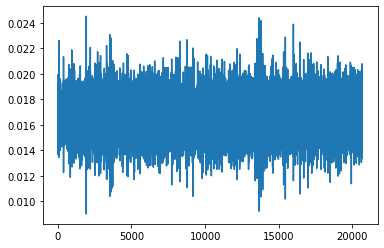

In [55]:
plt.plot(np.array(t_diff) / 705600000)

In [44]:
# 매 timestep이 약 17ms정도 되는걸로 보임